In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [145]:
#Display cell output for all expressions
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
#Set max rows displayed in a cell
pd.set_option('display.max_rows', 5)
#import data
bcd = pd.read_csv("C:/Users/jjden/Dropbox/Education/IU/python course/final project/Breast-Cancer-Wisconsin.csv",skip_blank_lines=True,header=0)
#check data
bcd.dtypes
bcd.head()
print (str(bcd.Scn.count()) + " rows of data in the data sample")

699 rows of data in the data sample


In [146]:
#Inspect missing data
a7 = bcd.A7
len(bcd.loc[a7 == '?'])
bcd.loc[a7 == '?']

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
...,...,...,...,...,...,...,...,...,...,...,...
411,1238464,1,1,1,1,1,?,2,1,1,2
617,1057067,1,1,1,1,1,?,1,1,1,2


#markdown
Replace ? by NaN in column A7. Use ____.replace('?', np.NaN) - but properly specify A7 column.
After replacing - your column needs to be converted back to numeric. Apply pandas function pd.to_numeric() for column A7
Report how many NaN. Use isnull() function applied to the dataframe. Then you can use arithmetic sum(). [Remember to use print() statement to report]
Replace NaN values with the mean of column A7. Use fillna() - find how to calculate mean of the column, add a parameter skipna=TRUE. Apply this function to the entire df - you do not need to specify here column A7

In [147]:
#replace missing data('?')
bcd.A7.replace('?',np.NaN)
bcd.A7 = pd.to_numeric(bcd.A7,errors='coerce')
print("Count of isnull (NaN) in column A7: " + str(bcd.A7.isnull().sum()))

#continue data cleanup
bcd.fillna(bcd.loc[:,"A7"].mean(skipna=True), inplace=True)

Count of isnull (NaN) in column A7: 16


#markdown
Provide the summary statistics - you can use describe() function
Find number of columns and number of rows - hint use ___.shape[] - use a proper index for column and row (consult pandas). Report how many observations (row) and columns
Report how many unique id values (column Scn) - hint the length of unique ids

In [148]:
#examine data further
print(bcd.describe())
shape = bcd.shape
print ("Here is the shape of bcd: There are " + str(shape[0]) + " observations (rows) and " + str(shape[1]) + " columns")
bcdunique = bcd.Scn.unique()
print ("There are " + str(len(bcdunique)) + " unique id values in column Scn.")

                Scn         A2          A3          A4          A5  \
count  6.990000e+02  699.00000  699.000000  699.000000  699.000000   
mean   1.071704e+06    4.41774    3.134478    3.207439    2.806867   
...             ...        ...         ...         ...         ...   
75%    1.238298e+06    6.00000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.00000   10.000000   10.000000   10.000000   

               A6          A7          A8          A9         A10       CLASS  
count  699.000000  699.000000  699.000000  699.000000  699.000000  699.000000  
mean     3.216023    3.544656    3.437768    2.866953    1.589413    2.689557  
...           ...         ...         ...         ...         ...         ...  
75%      4.000000    5.000000    5.000000    4.000000    1.000000    4.000000  
max     10.000000   10.000000   10.000000   10.000000   10.000000    4.000000  

[8 rows x 11 columns]
Here is the shape of bcd: There are 699 observations (rows) and 11 columns
T

Draw histograms for columns A2-A10. Note: you need to subset your dataframe - slice only columns A2-A10. Use histogram function, add a color of your choice. Note you need to run hist() function on your dataframe with selected columns only. It will output all 9 columns as subplots. Here do not worry about individual titles, y and x axis. You could adjust bins and alpha (opacity) on your histograms
Hint: Use this layout after calling hist(): plt.tight_layout(rect=(0, 0, 1.2, 1.2))  - to make it fit better. You can also turn grid off in histograms by adding grid=False to hist() parameters. Feel free to explore hist() parameters to enhance the look of histograms.

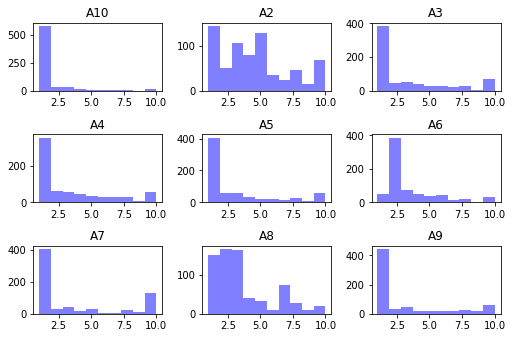

In [149]:
#draw histograms
num_bins = 10
hist = bcd.iloc[:,1:10].hist(facecolor='blue',alpha=0.5,grid=False,bins=num_bins)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

Draw a bar plot for CLASS - you can use groupby to see counts of  benign and malignant values or you can count values directly using pd.value_counts() function and apply it to plot.bar() function.

Text(0, 0.5, 'count')

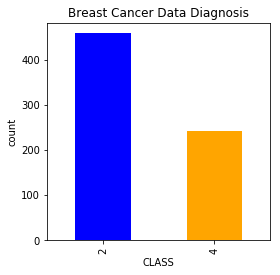

In [150]:
bar = bcd.groupby(['CLASS'])['Scn'].count().plot.bar(figsize=(4,4),color=('blue','orange'),title='Breast Cancer Data Diagnosis')
plt.ylabel('count')


Draw a scatterplot of any two columns.

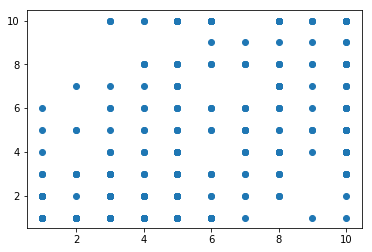

In [151]:
plt.scatter(bcd.A2,bcd.A3,marker='o')

Summarize by reporting which values might need standardization in the future (too much variation) and any other observations that you may discover as a Data Scientist.

Columns A7, A3, A9 all have standard deviation greater than 3. A standard normal distribution has sd of 1. Probably these columns at least could use standardization.

Phase 2 beginning

Use KMeans algorithm (do not use column CLASS) 10pts (use only columns A2-A10)

In [152]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
dfa2a9 = bcd[['A2','A3','A4','A5','A6','A7','A8','A9','A10']]
#print(type(dfa2a9))
#print(dfa2a9)
model.fit(dfa2a9.values)
print("Here are centroids:")
print(model.cluster_centers_)

Here are centroids:
[[2.94493392 1.24449339 1.36563877 1.29295154 2.03964758 1.3514006
  2.06167401 1.20044053 1.07709251]
 [7.23404255 4.85106383 5.04255319 4.86170213 4.11702128 9.38297872
  5.26595745 3.78723404 1.64893617]
 [7.46478873 7.02816901 6.67605634 4.1971831  5.53521127 3.45322005
  5.38028169 6.81690141 2.30985915]
 [6.7625     8.3875     8.425      7.75       6.775      9.2125
  7.375      7.7375     3.7875    ]]


Find the optimal number of clusters 10 pts
calculate inertia:
create a range from 1 to 15 or more,
create an empty list for inertias values
use for loop to calculate KMeans for each values

In [153]:
inertiaRange = range(1,16)
inertiaList = []
for x in inertiaRange:
    model = KMeans(n_clusters=x)
    model.fit(dfa2a9.values)
    inertiaList.append(model.inertia_)

plot range and inertia:
Add title, ylabel, xlabel

Text(0, 0.5, 'inertia')

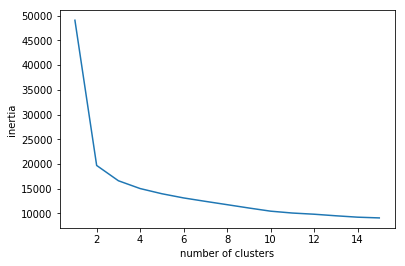

In [154]:
ax = plt.plot(inertiaRange,inertiaList)
plt.xlabel('number of clusters')
plt.ylabel('inertia')

specify the optimal number of clustes based on the inertia plot:

3 seems like the optimal number of clusters!

Revise data variation 10pts
apply standard deviation function for columns A2-A10
plot standard deviation values - select a graphic that could display all nine values [do not use histogram], add title, legend, ylabel, xlabel. Can you capture how wide or narrow is the variation in each column?
describe which features have a lot of data variation

A10    1.715078
A6     2.214300
         ...   
A9     3.053634
A7     3.601852
Length: 9, dtype: float64


Text(0, 0.5, 'standard deviation')

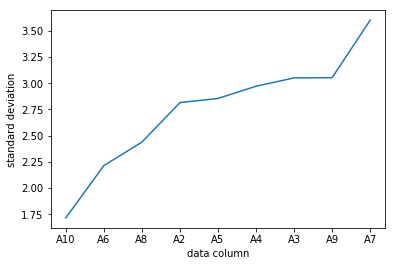

In [155]:
#dataframe.std() will run only on numeric columns, i.e. not the labels
stdev = dfa2a9.std()
stdev.sort_values(ascending=True,inplace=True)
print(stdev)
ax2 = plt.plot(stdev.index,stdev.values)
plt.xlabel('data column')
plt.ylabel('standard deviation')

Implement normalization 8pts
import make_pipeline - use sklearn.pipeline
import StandardScaler
review datacamp if needed on how to create a pipeline
use the n_cluster based on the optimal number you have identified from Inertia
find centroids and print them

In [156]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler,kmeans)
pipeline.fit(dfa2a9.values)
print("Here are centroids:")
print(kmeans.cluster_centers_)

Here are centroids:
[[-0.51945334 -0.61728918 -0.61702732 -0.52103625 -0.53370405 -0.60430508
  -0.56576652 -0.54283279 -0.29912703]
 [ 0.94324425  1.06056115  1.0579358   0.87929444  0.86029786  1.12907601
   1.00835139  0.92952452  0.03297812]
 [ 1.16860808  1.75960552  1.77223164  1.58294095  1.86961155  1.16430087
   1.3895322   1.56650375  3.80910288]]


Cluster - 5pts

Steps:

1. Change iteration to 500 and initial centroids to 20

The default values in KMeans are n_init=10 and max_iter=300. This means the initial centroids will be chosen 10 times, and each run will use up to 300 iterations. The best out of those 10 runs will be the final result. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html (Links to an external site.)Links to an external site.

2. Run Kmeans with n_clusters = 2

3. Save predicted clusters into a variable labels

In [157]:
kmeans = KMeans(n_clusters=2,n_init=20,max_iter=500)
pipeline = make_pipeline(scaler,kmeans)
pipeline.fit(dfa2a9.values)
print("Here are centroids:")
print(kmeans.cluster_centers_)
labels = kmeans.labels_
print("here are labels")
print(labels)

Here are centroids:
[[-0.49622257 -0.60690049 -0.60209195 -0.51491746 -0.50971347 -0.5806004
  -0.54770245 -0.53077769 -0.30375822]
 [ 0.98608331  1.20602021  1.19646478  1.02323341  1.01289215  1.1537572
   1.08838307  1.05475054  0.60362211]]
here are labels
[0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0
 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1
 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1
 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0
 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1
 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0
 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0

DataFrame - 5pts

Steps:
1. Create a new column in your dataframe and add Kmeans labels.
2. Change labels values so that 0 becomes 2 and 1 becomes 4.
3. Print the first 15 records from your dataframe

In [160]:
dfa2a9.is_copy = False 
#add back column CLASS
dfa2a9['CLASS'] = bcd['CLASS'].astype(int)
dfa2a9['label'] = labels
dfa2a9['label'] = dfa2a9['label'].replace(0,2)
dfa2a9['label'] = dfa2a9['label'].replace(1,4)
print(dfa2a9.head(15))

    A2  A3  A4  A5  A6    A7  A8  A9  A10  CLASS  label
0    5   1   1   1   2   1.0   3   1    1      2      2
1    5   4   4   5   7  10.0   3   2    1      2      4
..  ..  ..  ..  ..  ..   ...  ..  ..  ...    ...    ...
13   1   1   1   1   2   3.0   3   1    1      2      2
14   8   7   5  10   7   9.0   5   5    4      4      4

[15 rows x 11 columns]


C:\Users\jjden\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\jjden\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


Error Rate Function - 15 pts
Note: 2 - benign cells; 4 - malign cells
1. Create a function
Your ErrorRate function will take TWO input arguments. First argument is cluster you obtained from your k-means algorithm (column labels), and second argument is the actual value (column CLASS) of cluster for a particular datapoint. The output from your function will be 1) error rate for benign cells, 2) error rate for malign cells, 3) total error rate.
Calculate error rate using the following formula for each clusters:
error for benign
B = total number of points with predicted labels = 4 that correspond to CLASS = 2 / total number of predicted labels = 2
error for malign
M = total number of points with predicted labels = 2 that correspond to CLASS = 4 / total number of predicted labels = 4
total error rate
total number of datapoints with predicted labels (labels column) Not equal to actual class (CLASS column) / total number of datapoints
2. Pass your columns values into function and print out the error rate values. You can add a descriptive text to your output. 
For example: "error rate for benign: --, error rate for malign: --, total error rate: --"

In [159]:
numBenignError = sum((dfa2a9.label == 4) & (dfa2a9.CLASS == 2))
numMalignError = sum((dfa2a9.label == 2) & (dfa2a9.CLASS == 4))
totalRecords = len(dfa2a9)

print("error rate for benign: " + str(numBenignError/totalRecords) )
print("error rate for malign: " + str(numMalignError/totalRecords) )
print("total error rate: " + str((numBenignError + numMalignError)/totalRecords) )
print(dfa2a9)


error rate for benign: 0.017167381974248927
error rate for malign: 0.027181688125894134
total error rate: 0.044349070100143065
     A2  A3  A4  A5  A6    A7  A8  A9  A10  CLASS  label
0     5   1   1   1   2   1.0   3   1    1      2      2
1     5   4   4   5   7  10.0   3   2    1      2      4
..   ..  ..  ..  ..  ..   ...  ..  ..  ...    ...    ...
697   4   8   6   4   3   4.0  10   6    1      4      4
698   4   8   8   5   4   5.0  10   4    1      4      4

[699 rows x 11 columns]


Report - 5pts

Add your report statement (~150-200 words): your reflection on the final project results (Note - the aim of the final project is NOT to build an optimal model but to practice the workflow using python - so your results may not be the best.)

The values change each time the code is executed as expected because the clusters are allocated a bit differently each time. The model seems to predict benign and malign pretty well with approximately a 4% error rate. The model could probably be trained to a higher degree of accuracy by increasing the number of initial centroids and iterations. Another way to increase accuracy would be by having a larger sample set. It's also interesting to note that there is higher variance in some of the columns - notably A9 and A7 - so having a larger sample set would probably help to narrow the overall confidence interval. 

I found this exercise a nice practice to pull together some of the elements that we've learned this semester in the class. I definitely enjoyed it since it made us think for ourselves. The datacamp exercises were a little bit too canned for my taste. They were simple to do but I think it was a difficult to develop confidence and overall understanding and retention without doing exercises like this one that we did for the final project.

Also note that I didn't include an error rate function but directly calculated error rate. I found the description of the function contradictory and confusing but I understood the intent so I just directly calculated the final results - hope that is fine. Thanks.